In [ ]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Upload the file
uploaded = files.upload()
import shutil
shutil.move(list(uploaded.keys())[0], '/content/Healthcare_dataset.xlsx')

# Read the CSV file into a Pandas DataFrame
file_path = '/content/Healthcare_dataset.xlsx'
df = pd.read_excel(file_path)
df.head()

Saving Healthcare_dataset.xlsx to Healthcare_dataset.xlsx


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)




Data types of each column:
Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object


In [ ]:
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Encode categorical variables
encoder = LabelEncoder()
df['Persistency_Flag'] = encoder.fit_transform(df['Persistency_Flag'])
df = pd.get_dummies(df)


Summary statistics for numerical variables:
       Persistency_Flag  Dexa_Freq_During_Rx  Count_Of_Risks
count       3424.000000          3424.000000     3424.000000
mean           0.376460             3.016063        1.239486
std            0.484568             8.136545        1.094914
min            0.000000             0.000000        0.000000
25%            0.000000             0.000000        0.000000
50%            0.000000             0.000000        1.000000
75%            1.000000             3.000000        2.000000
max            1.000000           146.000000        7.000000


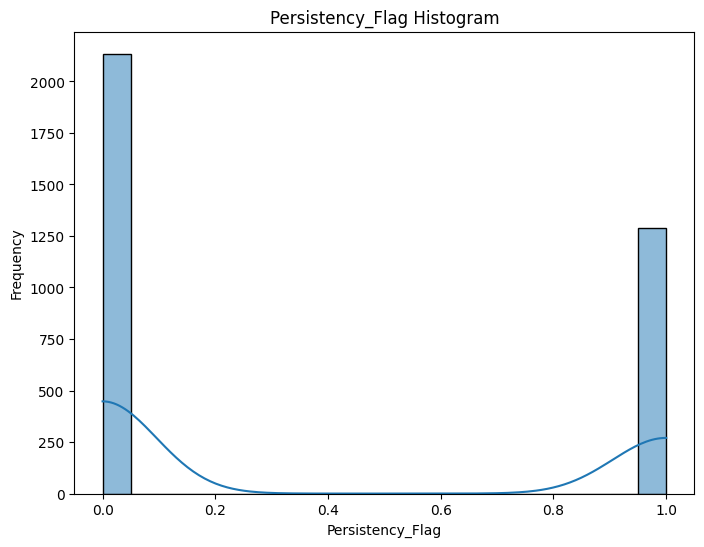

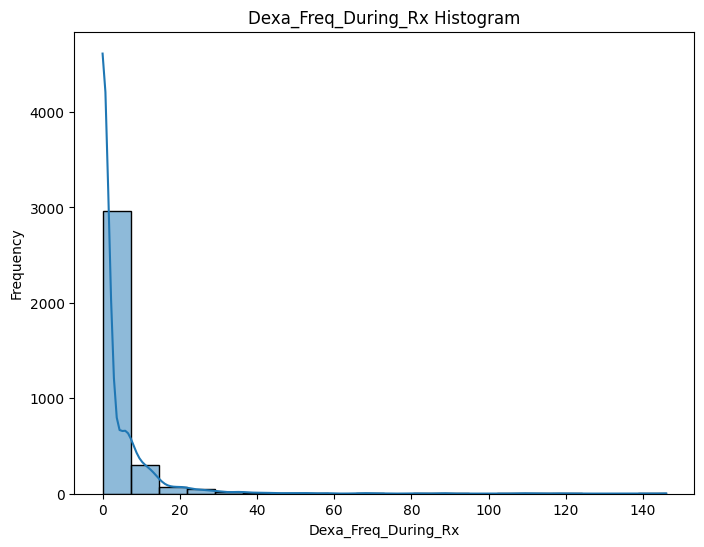

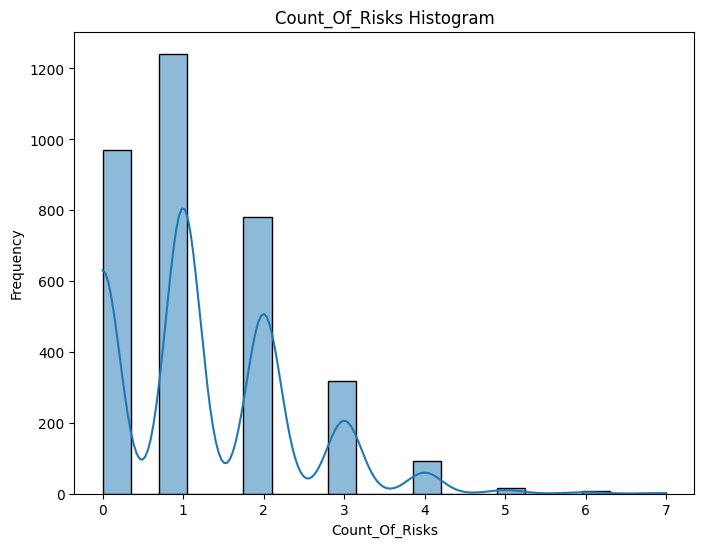

In [ ]:

print("\nSummary statistics for numerical variables:")
print(df.describe())

# Frequency count for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print("\nFrequency count for", col, ":")
    print(df[col].value_counts())

# Visualization of numerical variables
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms for numerical variables
numerical_cols = df.select_dtypes(include=['int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col + " Histogram")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Bar plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(col + " Bar Plot")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Separate features and target variable
X = df.drop('Persistency_Flag', axis=1)
y = df['Persistency_Flag']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))


              precision    recall  f1-score   support

           0       0.81      0.90      0.85       431
           1       0.79      0.63      0.70       254

    accuracy                           0.80       685
   macro avg       0.80      0.77      0.78       685
weighted avg       0.80      0.80      0.80       685

                                                Feature  Importance
0                                   Dexa_Freq_During_Rx    0.050629
3490                                   Dexa_During_Rx_Y    0.036809
3489                                   Dexa_During_Rx_N    0.028276
3524  Comorb_Encntr_For_General_Exam_W_O_Complaint,_...    0.017371
3522                Comorb_Encounter_For_Immunization_Y    0.017336
...                                                 ...         ...
2043                                         Ptid_P2836    0.000000
2039                                         Ptid_P2832    0.000000
2035                                         Ptid_P2829    0.